## Python notebook 
V nasledujúcom notebooku sú popísané Python metódy použité pre analýzu dát. Obsah notebooku je nasledujúci:
1. Import potrebných knižníc
2. Predspracovanie dát a inicializácie data augmetora
3. Hlboké učenie
4. Vyhodnotenie modelu
4. Vizuálne overenie nesprávne zaklasifikovaných udalostí

# 1. Import potrebných knižníc

In [72]:
import numpy as np
import cv2 #obrazok na pole konverzia
import os
import random
import matplotlib.pyplot as plt
import pickle

import pandas as pd
import sklearn.metrics
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow, show

import tensorflow
from tensorflow.image import random_contrast, random_brightness
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model

# 2. Predspracovanie dát
Extrahované udalosti premeníme na číselnú reprezentáciu, vytiahneme z dát len hodnoty pre červený kanál a uložíme do premennej typu array. Zamiešame uložené dáta a vytvoríme pickle súbor. Tento krok urobíme pre trénovaciu aj testovaciu zložku.

DIRECTORY - Zložka obsahujúca extrahované udalosti

CATEGORIES - Kategórie počtu disperzií

In [2]:
DIRECTORY = r'/home/jovyan/data/lightning/Samuel/2_roc_zs/vyrezavanie_tweekov/data_split_smoothed/train'
CATEGORIES = ['tweek1', 'tweek2', 'tweek3', 'tweek4more']

In [5]:
data = []

#prejde foldre s obrazkami, skonvertuje na pole a ulozi do listu
for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    label = CATEGORIES.index(category)
    #prejde obrazky
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        #print(img_path)
        if(img_path == '/home/jovyan/data/lightning/Samuel/2_roc_zs/vyrezavanie_tweekov/data_split_smoothed/train/tweek1/.DS_Store'):
            continue
        if(img_path == '/home/jovyan/data/lightning/Samuel/2_roc_zs/vyrezavanie_tweekov/data_split_smoothed/train/tweek2/.DS_Store'):
            continue
        if(img_path == '/home/jovyan/data/lightning/Samuel/2_roc_zs/vyrezavanie_tweekov/data_split_smoothed/train/tweek3/.DS_Store'):
            continue
        if(img_path == '/home/jovyan/data/lightning/Samuel/2_roc_zs/vyrezavanie_tweekov/data_split_smoothed/train/tweek4more/.DS_Store'):
            continue
        if(img_path == '/home/jovyan/data/lightning/Samuel/2_roc_zs/vyrezavanie_tweekov/data_split_smoothed/train/tweek4more/.ipynb_checkpoints'):
            continue
        img_arr = cv2.imread(img_path) #konverzia img - pole
        r = img_arr.copy()
        r[:, :, 0] = 0
        r[:, :, 1] = 0
        #plt.imshow(img_arr)
        #break
        r = cv2.resize(r, (40, 150)) #normalizacia velkosti obrazkov
        r = cv2.cvtColor(r, cv2.COLOR_BGR2RGB)
        data.append([r, label])

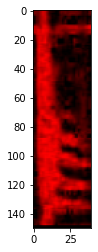

In [6]:
plt.imshow(r)

In [7]:
len(data)

2322

In [8]:
random.seed(100)

In [9]:
random.shuffle(data)

In [10]:
X = [] #data
y = [] #label

for features, labels in data:
    X.append(features)
    y.append(labels)

In [11]:
X = np.array(X)
y = np.array(y)

In [12]:
len(X)

2322

In [13]:
pickle.dump(X, open('X_train_red.pkl', 'wb'))
pickle.dump(y, open('y_train_red.pkl', 'wb'))

In [98]:
DIRECTORY2 = r'/home/jovyan/data/lightning/Samuel/2_roc_zs/vyrezavanie_tweekov/data_split_smoothed/test'
CATEGORIES2 = ['tweek1', 'tweek2', 'tweek3', 'tweek4more']

In [99]:
data2 = []
pathvar = []

for category in CATEGORIES2:
    folder = os.path.join(DIRECTORY2, category)
    label = CATEGORIES2.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        #print(img_path)
        if(img_path == '/home/jovyan/data/lightning/Samuel/2_roc_zs/vyrezavanie_tweekov/data_split_smoothed/test/tweek1/.DS_Store'):
            continue
        if(img_path == '/home/jovyan/data/lightning/Samuel/2_roc_zs/vyrezavanie_tweekov/data_split_smoothed/test/tweek2/.DS_Store'):
            continue
        if(img_path == '/home/jovyan/data/lightning/Samuel/2_roc_zs/vyrezavanie_tweekov/data_split_smoothed/test/tweek3/.DS_Store'):
            continue
        if(img_path == '/home/jovyan/data/lightning/Samuel/2_roc_zs/vyrezavanie_tweekov/data_split_smoothed/test/tweek4more/.DS_Store'):
            continue
        if(img_path == '/home/jovyan/data/lightning/Samuel/2_roc_zs/vyrezavanie_tweekov/data_split_smoothed/test/tweek1/.ipynb_checkpoints'):
            continue
        if(img_path == '/home/jovyan/data/lightning/Samuel/2_roc_zs/vyrezavanie_tweekov/data_split_smoothed/test/tweek2/.ipynb_checkpoints'):
            continue
        if(img_path == '/home/jovyan/data/lightning/Samuel/2_roc_zs/vyrezavanie_tweekov/data_split_smoothed/test/tweek3/.ipynb_checkpoints'):
            continue
        if(img_path == '/home/jovyan/data/lightning/Samuel/2_roc_zs/vyrezavanie_tweekov/data_split_smoothed/test/tweek4more/.ipynb_checkpoints'):
            continue
        img_arr = cv2.imread(img_path) #konverzia img - pole
        r = img_arr.copy()
        r[:, :, 0] = 0
        r[:, :, 1] = 0
        #plt.imshow(img_arr)
        #break
        r = cv2.resize(r, (40, 150)) #normalizacia velkosti obrazkov
        r = cv2.cvtColor(r, cv2.COLOR_BGR2RGB)
        pathvar.append([img])
        data2.append([r, label])

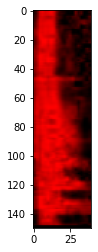

In [100]:
plt.imshow(r)

In [101]:
len(data2)

175

In [102]:
X_test = []
y_test = []

for features, labels in data2:
    X_test.append(features)
    y_test.append(labels)

In [103]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [104]:
pickle.dump(X_test, open('X_test.pkl', 'wb'))
pickle.dump(y_test, open('y_test.pkl', 'wb'))

In [105]:
pathvar = np.array(pathvar)

In [106]:
pickle.dump(pathvar, open('images.pkl', 'wb'))

In [107]:
X = pickle.load(open('X_train_red.pkl', 'rb'))
y = pickle.load(open('y_train_red.pkl', 'rb'))

X_test = pickle.load(open('X_test.pkl', 'rb'))
y_test = pickle.load(open('y_test.pkl', 'rb'))

In [108]:
X = X/255
X_test = X_test/255

In [24]:
X.shape

(2322, 150, 40, 3)

In [25]:
y.shape

(2322,)

In [26]:
X_test.shape

(175, 150, 40, 3)

# 3. Hlboké učenie
Hlboké učenie je realizované neurónovou sieťou. Ukladaný je najlepší model z hľadiska validačnej straty. Model je trénovaný na 30 epoch.

In [27]:
model = Sequential()

model.add(Conv2D(16, (3, 3), activation = 'relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), padding = 'same'))
#model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2), padding = 'same'))
#model.add(BatchNormalization())
#model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2), padding = 'same'))
#model.add(BatchNormalization())
#model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2), padding = 'same'))
#model.add(BatchNormalization())
#model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
#model.add(Dropout(0.5))
model.add(Dense(4, activation = 'softmax'))

In [28]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [29]:
saved_model = "model_red.hdf5"
checkpoint = ModelCheckpoint(saved_model, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early = EarlyStopping(monitor="val_accuracy", mode="max", patience=5)
callbacks_list = [checkpoint, early]

In [30]:
history = model.fit(X, y, epochs = 30, validation_split = 0.2, batch_size = 64, callbacks = callbacks_list)

Epoch 1/30
30/30 [==============================] - ETA: 0s - loss: 1.3497 - accuracy: 0.3463
Epoch 00001: val_loss improved from inf to 1.51359, saving model to model_red.hdf5
30/30 [==============================] - 2s 72ms/step - loss: 1.3497 - accuracy: 0.3463 - val_loss: 1.5136 - val_accuracy: 0.2753
Epoch 2/30
29/30 [============================>.] - ETA: 0s - loss: 1.2650 - accuracy: 0.4143
Epoch 00002: val_loss improved from 1.51359 to 1.14548, saving model to model_red.hdf5
30/30 [==============================] - 1s 41ms/step - loss: 1.2648 - accuracy: 0.4146 - val_loss: 1.1455 - val_accuracy: 0.4731
Epoch 3/30
29/30 [============================>.] - ETA: 0s - loss: 1.1321 - accuracy: 0.4758
Epoch 00003: val_loss improved from 1.14548 to 1.07895, saving model to model_red.hdf5
30/30 [==============================] - 1s 40ms/step - loss: 1.1322 - accuracy: 0.4755 - val_loss: 1.0790 - val_accuracy: 0.5226
Epoch 4/30
29/30 [============================>.] - ETA: 0s - loss: 1.0

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 38, 16)       448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 19, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 17, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 9, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 7, 64)         18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 4, 64)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 2, 64)         3

# 4. Vyhodnotenie modelu
Trénovacia a validačná strata

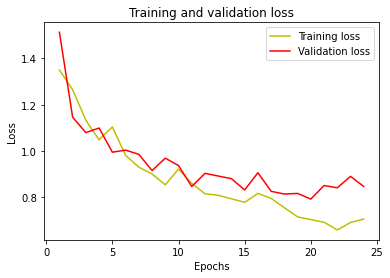

In [32]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Trénovacia a validačná presnosť

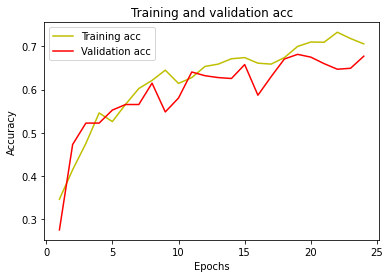

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Načítame najlepší model a použijeme ho na predikciu testovacej množiny. Predikciu modelu a True label spojíme do tabuľky a vytvoríme kontingenčnú tabuľku a klasifikačný report modelu.

In [109]:
model = load_model('model_red.hdf5')

In [110]:
predictions = model.predict_classes(X_test, batch_size = 30)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 3, 1, 2, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 0, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 2, 3, 3, 2, 2])

In [111]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [112]:
df = pd.DataFrame(list(zip(y_test, predictions)), columns =['True', 'Prediction'])
df

,True,Prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
170,3,2
171,3,3
172,3,3
173,3,2


In [113]:
y_true = df['True']
y_pred = df['Prediction']

In [114]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_true, y_pred, labels=None, sample_weight=None, normalize=None)
classification_report = sklearn.metrics.classification_report(y_true, y_pred)
print(confusion_matrix)

[[39  4  3  0]
 [ 0 21  2  2]
 [ 0  6 52  4]
 [ 1  1 12 28]]


In [115]:
print(classification_report)

              precision    recall  f1-score   support

           0       0.97      0.85      0.91        46
           1       0.66      0.84      0.74        25
           2       0.75      0.84      0.79        62
           3       0.82      0.67      0.74        42

    accuracy                           0.80       175
   macro avg       0.80      0.80      0.79       175
weighted avg       0.81      0.80      0.80       175



# 5. Vizuálne overenie nesprávne zaklasifikovaných eventov
Vytvoríme tabuľku obsahujúcu informácie o eventoch pozostávajúcu s Labelu, Predikcie, Predspracovaného obrázku a Mena obrázku. Ďalej vyfiltrujeme len nesprávne predikované eventy a zobrazíme ich pre vizuálnu kontrolu.

In [116]:
preds = df
preds.to_csv('predictions_red.csv', index=False)

In [117]:
X_test = pickle.load(open('X_test.pkl', 'rb'))
preds = pd.read_csv("predictions_red.csv")
images = pickle.load(open('images.pkl', 'rb'))

In [118]:
X_test = X_test/255

In [119]:
preds_true = preds['True']
preds_preds = preds['Prediction']

In [120]:
to_plot = pd.DataFrame(list(zip(preds_true, preds_preds, X_test)), columns =['True', 'Prediction', 'Img'])

In [121]:
false_pred = to_plot.drop(to_plot.index[to_plot['True'] == to_plot['Prediction']])
false_pred = false_pred.reset_index()
false_pred =false_pred.drop(columns=['index'])

In [122]:
false_pred['True'].replace({0:1, 1:2, 2:3, 3:4}, inplace = True)
false_pred['Prediction'].replace({0:1, 1:2, 2:3, 3:4}, inplace = True)

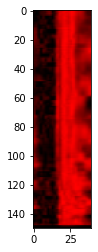

Predikcia:  3
True:  1


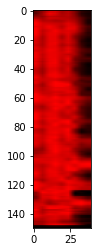

Predikcia:  3
True:  1


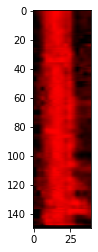

Predikcia:  3
True:  1


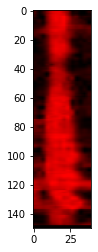

Predikcia:  2
True:  1


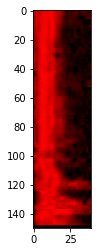

Predikcia:  2
True:  1


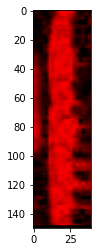

Predikcia:  2
True:  1


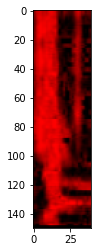

Predikcia:  2
True:  1


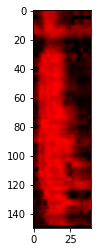

Predikcia:  3
True:  2


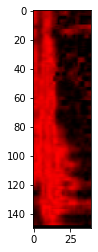

Predikcia:  3
True:  2


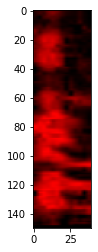

Predikcia:  4
True:  2


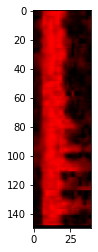

Predikcia:  4
True:  2


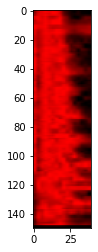

Predikcia:  4
True:  3


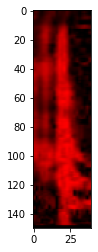

Predikcia:  2
True:  3


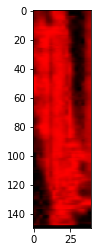

Predikcia:  2
True:  3


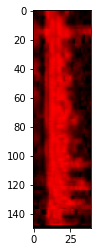

Predikcia:  2
True:  3


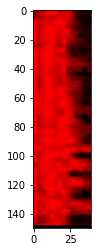

Predikcia:  4
True:  3


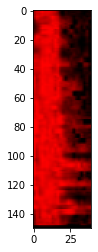

Predikcia:  4
True:  3


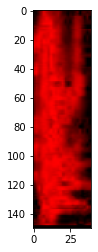

Predikcia:  2
True:  3


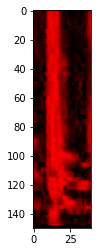

Predikcia:  2
True:  3


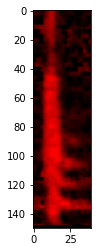

Predikcia:  2
True:  3


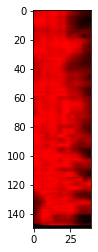

Predikcia:  4
True:  3


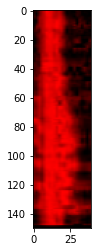

Predikcia:  3
True:  4


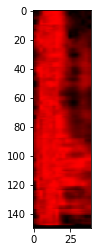

Predikcia:  3
True:  4


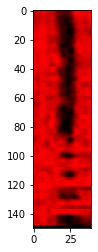

Predikcia:  3
True:  4


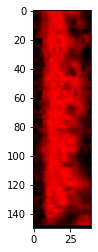

Predikcia:  1
True:  4


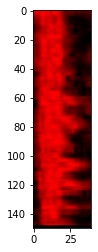

Predikcia:  3
True:  4


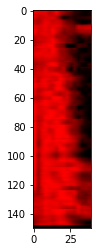

Predikcia:  3
True:  4


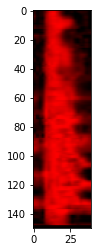

Predikcia:  3
True:  4


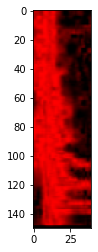

Predikcia:  3
True:  4


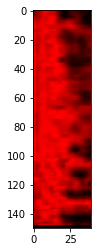

Predikcia:  3
True:  4


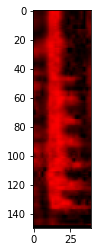

Predikcia:  2
True:  4


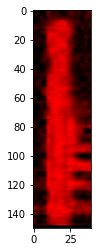

Predikcia:  3
True:  4


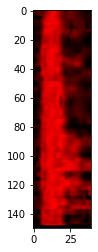

Predikcia:  3
True:  4


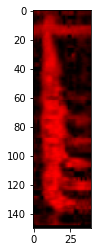

Predikcia:  3
True:  4


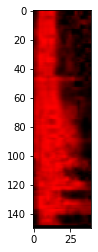

Predikcia:  3
True:  4


In [123]:
for ind in false_pred.index:
    plt.imshow(false_pred['Img'][ind])
    plt.show()
    print('Predikcia: ', false_pred['Prediction'][ind])
    print('True: ', false_pred['True'][ind])